<a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Tree_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -.-|m { input: false, output: false, output_error: false}
%load_ext pretty_jupyter

<p><a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Tree_Ensembles.ipynb" target="_blank"><img data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" src="https://camo.githubusercontent.com/84f0493939e0c4de4e6dbe113251b4bfb5353e57134ffd9fcab6b8714514d4d1/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667"></a></p>

A superintendent would like to understand how students are performing in three key subject areas—math, reading, and writing—to determine the level of funding required for various schools and also to ensure that every student succeeds as part of the Every Student Succeeds Act (ESSA).

The superintendent has collected the [data](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) of 1,000 students in her district representing various schools and backgrounds. The following five data points are collected for each student:
- Gender
- Ethnicity
- Parent Level of Education
- Type of Lunch purchased by the student
- Test Preparation level

Note that our dataset contains a couple of protected attributes that we use as features for the model primarily to learn how to expose, through interpretability techniques, possible issues with the model pertaining to bias.

Protected attributes are attributes associated with an individual related to social bias, including gender, age, race, ethnicity, sexual orientation, and so on. Laws in certain regions like the United States and Europe prohibit discriminating against individuals on the basis of these protected attributes, especially in domains like housing, employment, and credit lending. It is important to be aware of these legal frameworks and nondiscrimination laws when building machine learning models that may use these protected attributes as features. We want to ensure that machine learning models do not embed bias and discriminate against certain individuals on the basis of protected attributes.

**Prompt**:  
Show a few rows of the dataset  
'https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv'  
as a table.

---

ChatGPT will show the first few rows in the table directly. You can use prompt "use python" to get the following code:

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv'
df = pd.read_csv(url)

# Display first 5 rows as a table
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Exploratory Data Analysis

Let us perform some exploratory data analysis.

**Prompt**:  
Get the data from the following URL:

https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv

The dataset comprises five features: Gender, Ethnicity, Parent Level of Education, Type of Lunch, and Test Preparation Level. These features are represented by the columns, 'gender', 'race/ethnicity', 'parental level of education', 'lunch', and 'test preparation course', respectively.
The dataset also includes three target variables for each student: math grade, reading grade, and writing grade. These variables are denoted by the columns 'math score', 'reading score', and 'writing score', respectively.

In the following conversation, I would like to request your assistance in data analysis. Please provide me with the relevant Python code.  

Show bar plots for the proportions for the features 'race/ethnicity' and 'parental level of education'.

---

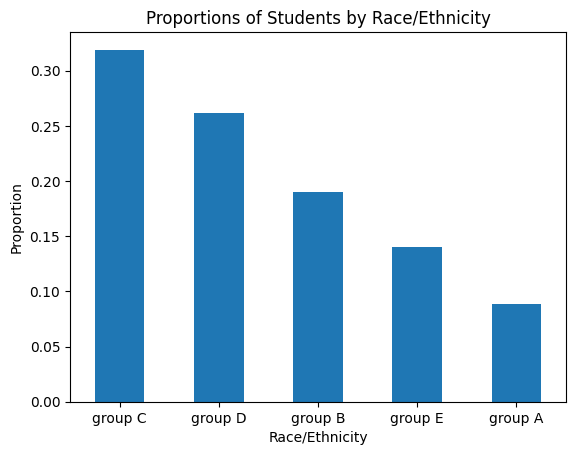

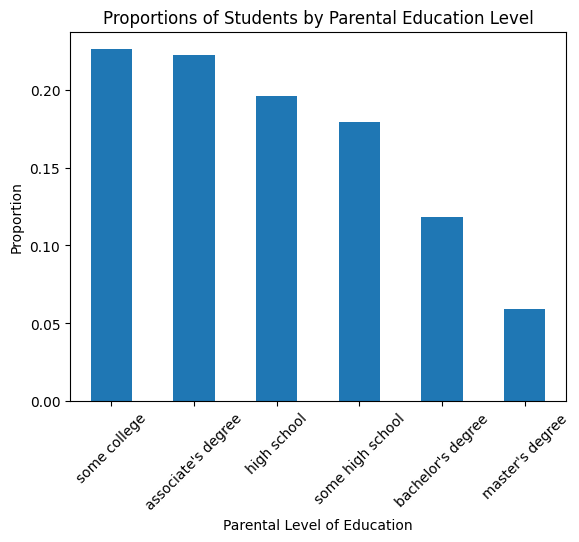

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv'
df = pd.read_csv(url)

# Calculate proportions for 'race/ethnicity'
race_counts = df['race/ethnicity'].value_counts(normalize=True)
race_counts.plot(kind='bar', rot=0)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Proportion')
plt.title('Proportions of Students by Race/Ethnicity')
plt.show()

# Calculate proportions for 'parental level of education'
education_counts = df['parental level of education'].value_counts(normalize=True)
education_counts.plot(kind='bar', rot=45)
plt.xlabel('Parental Level of Education')
plt.ylabel('Proportion')
plt.title('Proportions of Students by Parental Education Level')
plt.show()


**Prompt**:  
To facilitate training classifiers to predict student grades in various subjects, please convert the scores to grades into three new columns, 'math grade', 'reading grade', and 'writing grade', using the following criteria:

Grade A: score >= 80, Grade B: 60 <= score < 80, Grade C: 40 <= score < 60, Grade F: score < 40.  

Show a clustered column plot for the proportions of students who earn grades A, B, C, or F for all three subject areas (math, reading, and writing), clustered by grades. The x-Axis of the plot needs to be sorted from A to F.

---

You may need follow-up prompts to reminder ChatGPT that "you only showed math" or "I need clustered column plot".

If you try to show each plot one by one, there is a possibility that ChatGPT may forget the information between plots. To ensure that the data information is retained, it would be better to include data information in the prompt every time.

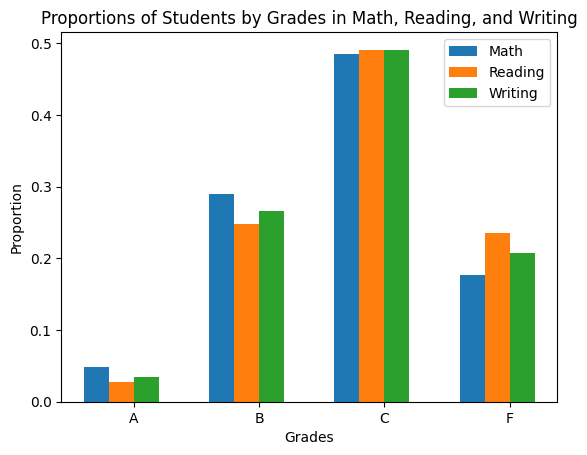

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv'
df = pd.read_csv(url)

# Convert scores to grades
df['math grade'] = pd.cut(df['math score'], bins=[0, 40, 60, 80, 100], labels=['F', 'C', 'B', 'A'])
df['reading grade'] = pd.cut(df['reading score'], bins=[0, 40, 60, 80, 100], labels=['F', 'C', 'B', 'A'])
df['writing grade'] = pd.cut(df['writing score'], bins=[0, 40, 60, 80, 100], labels=['F', 'C', 'B', 'A'])

# Calculate proportions of grades for each subject
math_grade_proportions = df['math grade'].value_counts(normalize=True).sort_index()
reading_grade_proportions = df['reading grade'].value_counts(normalize=True).sort_index()
writing_grade_proportions = df['writing grade'].value_counts(normalize=True).sort_index()

# Create a clustered column plot
grades = ['A', 'B', 'C', 'F']
subjects = ['Math', 'Reading', 'Writing']
proportions = [math_grade_proportions, reading_grade_proportions, writing_grade_proportions]

# Set up the plot
fig, ax = plt.subplots()
width = 0.2
x = range(len(grades))

# Plot the clustered columns
for i, subject in enumerate(subjects):
    ax.bar(x, proportions[i], width, label=subject)
    x = [xi + width for xi in x]

# Customize the plot
ax.set_xlabel('Grades')
ax.set_ylabel('Proportion')
ax.set_title('Proportions of Students by Grades in Math, Reading, and Writing')
ax.set_xticks([r + (width * 1.5) for r in range(len(grades))])
ax.set_xticklabels(grades)
ax.legend()

plt.show()


**Prompt**:  
For each subject, show a clustered column plot, clustered by grades, for grade distributions comparing the percentage of students whose parents have high school education vs. a master's degree. The x-Axis of the plot needs to be sorted from A to F.

---

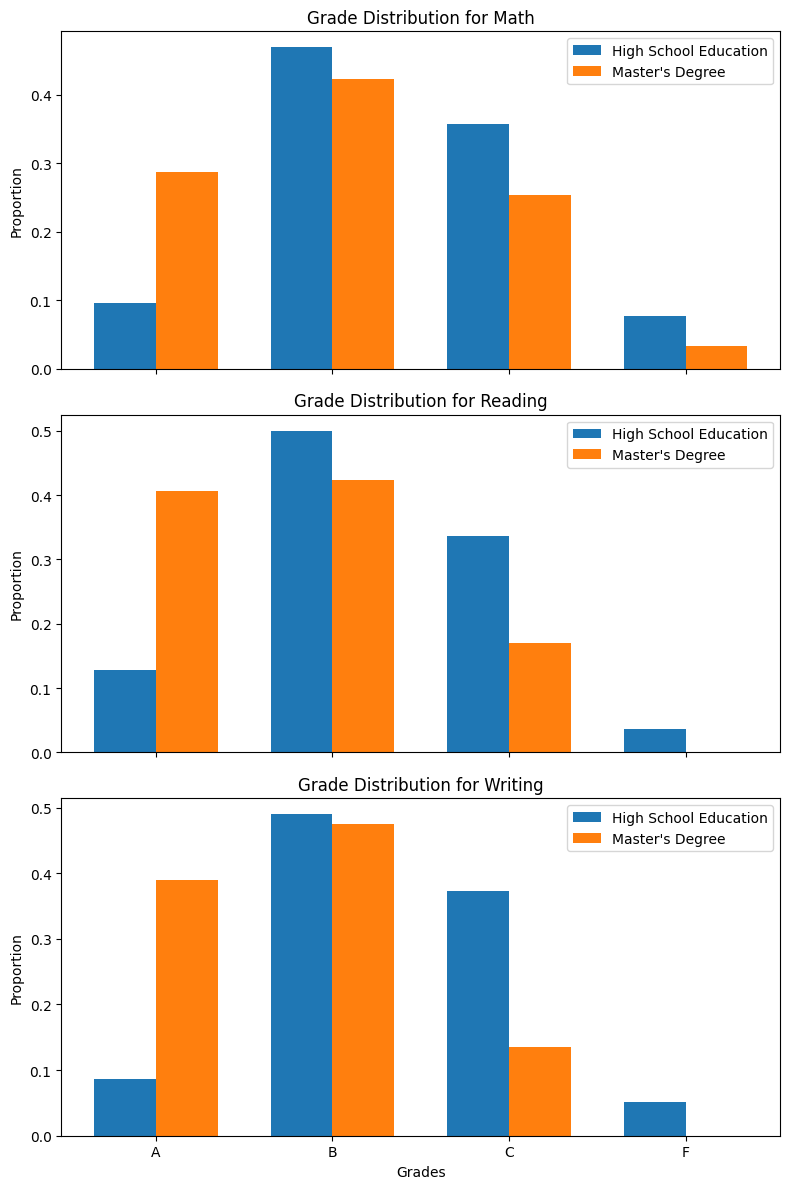

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv'
df = pd.read_csv(url)

# Convert scores to grades
df['math grade'] = pd.cut(df['math score'], bins=[0, 40, 60, 80, 100], labels=['F', 'C', 'B', 'A'])
df['reading grade'] = pd.cut(df['reading score'], bins=[0, 40, 60, 80, 100], labels=['F', 'C', 'B', 'A'])
df['writing grade'] = pd.cut(df['writing score'], bins=[0, 40, 60, 80, 100], labels=['F', 'C', 'B', 'A'])

# Filter the data for parents with high school education and master's degree
high_school_df = df[df['parental level of education'] == "high school"]
masters_df = df[df['parental level of education'] == "master's degree"]

# Calculate grade proportions for each subject and parent education level
grades = ['A', 'B', 'C', 'F']
subjects = ['Math', 'Reading', 'Writing']

# Set up the plot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12), sharex=True)
width = 0.35
x = range(len(grades))

# Plot clustered columns for each subject
for i, subject in enumerate(subjects):
    ax = axs[i]

    # Calculate grade proportions for high school education
    high_school_proportions = high_school_df[subject.lower() + ' grade'].value_counts(normalize=True).sort_index()
    high_school_values = [high_school_proportions.get(grade, 0) for grade in grades]
    ax.bar(x, high_school_values, width, label="High School Education")

    # Calculate grade proportions for master's degree
    masters_proportions = masters_df[subject.lower() + ' grade'].value_counts(normalize=True).sort_index()
    masters_values = [masters_proportions.get(grade, 0) for grade in grades]
    ax.bar([xi + width for xi in x], masters_values, width, label="Master's Degree")

    # Customize the plot for each subject
    ax.set_ylabel('Proportion')
    ax.set_title(f'Grade Distribution for {subject}')
    ax.set_xticks([r + (width / 2) for r in x])
    ax.set_xticklabels(grades)
    ax.legend()

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Grades')

plt.tight_layout()
plt.show()

# Random Forest

**Prompt**:  
Get the data from the following URL:

https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv

We will use five features: 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', to predict 'math score'.  

1) Convert 'math score' to grades into a new column, 'math grade', using the following criteria: Grade A: score >= 80, Grade B: 60 <= score < 80, Grade C: 40 <= score < 60, Grade F: score < 40.  

2) Because the input features ('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course') are textual and categorical, create a new column for each feature that the text of each input feature is encoded to a numerical value.  

3) Splits the data into training/validation and test sets. Build a random forest model to predict math grade by using features ('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'). Report testing accuracy.

---

If ChatGPT persistently uses a dummy variable, you may ask it to use the `LabelEncoder` function for performing the conversion.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Retrieve and load the data
url = 'https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv'
data = pd.read_csv(url)

# Step 2: Convert 'math score' to 'math grade'
def assign_math_grade(score):
    if score >= 80:
        return 'A'
    elif 60 <= score < 80:
        return 'B'
    elif 40 <= score < 60:
        return 'C'
    else:
        return 'F'

data['math grade'] = data['math score'].apply(assign_math_grade)

# # # # # # # # # # # # # # # #
# ChatGPT may use the following way to convert math score.
# If so, we need to drop missing data before fitting
# Convert the scores to grades
# data['math grade'] = pd.cut(data['math score'], bins=[0, 40, 60, 80, 100], labels=['F', 'C', 'B', 'A'])
# data = data.dropna(subset=['math grade'])

# Step 3: Encode categorical features into numerical values
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature + '_encoded'] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# # # # # # # # # # # # # # # #
# Need to encode the column in right order to better understand partial dependence plots

# print(label_encoders['parental level of education'].classes_)
# le = LabelEncoder()
# data['parental level of education_encoded'] = le.fit_transform(data['parental level of education'].map({
#     'high school': 0,
#     'some high school': 1,
#     'some college': 2,
#     "associate's degree": 3,
#     "bachelor's degree": 4,
#     "master's degree": 5
# }))


# Step 4: Split the data into training/validation and test sets
features = [feature + '_encoded' for feature in categorical_features]
target = 'math grade'

X_train_val, X_test, y_train_val, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)
# # # # # # # # # # # # # # # #
# It is better to use stratified sample
# X_train_val, X_test, y_train_val, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42, stratify=data['math grade'])
# print(y_train_val.value_counts())
# print(y_test.value_counts())

# Step 5: Build and train the random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_val, y_train_val)

# Step 6: Evaluate the model's accuracy on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Testing Accuracy: {accuracy}")

Testing Accuracy: 0.395


Tree Ensembles
- Bagging: Multiple decision trees are trained in parallel on separate random subsets of the training data. Random forest is a tree ensemble using the bagging technique.
- Boosting: Multiple decision trees are trained in sequence. The objective of the second decision tree is to learn from the errors made by the first tree and to further improve the performance.




# Feature Importance

Random forest a black-box model. It is much harder to visualize and interpret how features are split across all decision trees because random subsets of the data and features are taken for each of them.

**Prompt**:  
Continue the code. Show feature importance in a clustered column plot.

---

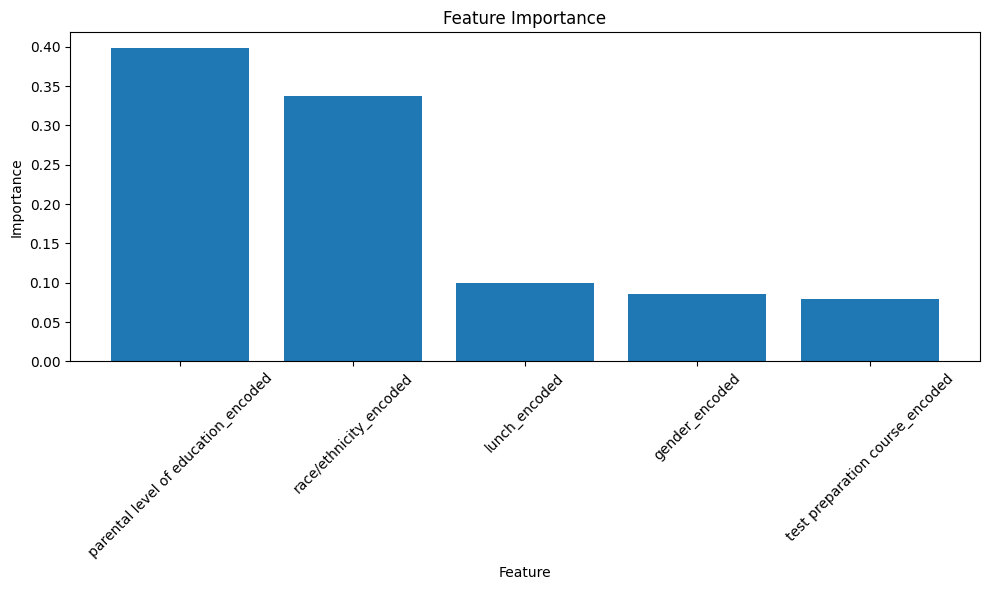

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# Partial Dependence Plots

**Prompt**:  
Suppose that for the random forest model, we want to understand what
effect different parent levels of education have on predicting a given grade. To
achieve this, we will need to do the following:

1) Use the same values for the rest of the features as were used in the dataset.

2) Create an artificial dataset by setting Parent Level of Education to be the value of interest for all data points—if you are interested in looking at the average effects of high school education on the student’s grade, then set Parent Level of Education to be high school for all data points.

3) Run through the model, and obtain the predictions for all data points in this
artificial set.

4) Take the average of the predictions to determine the overall average effect for that Parent Level of Education.

---

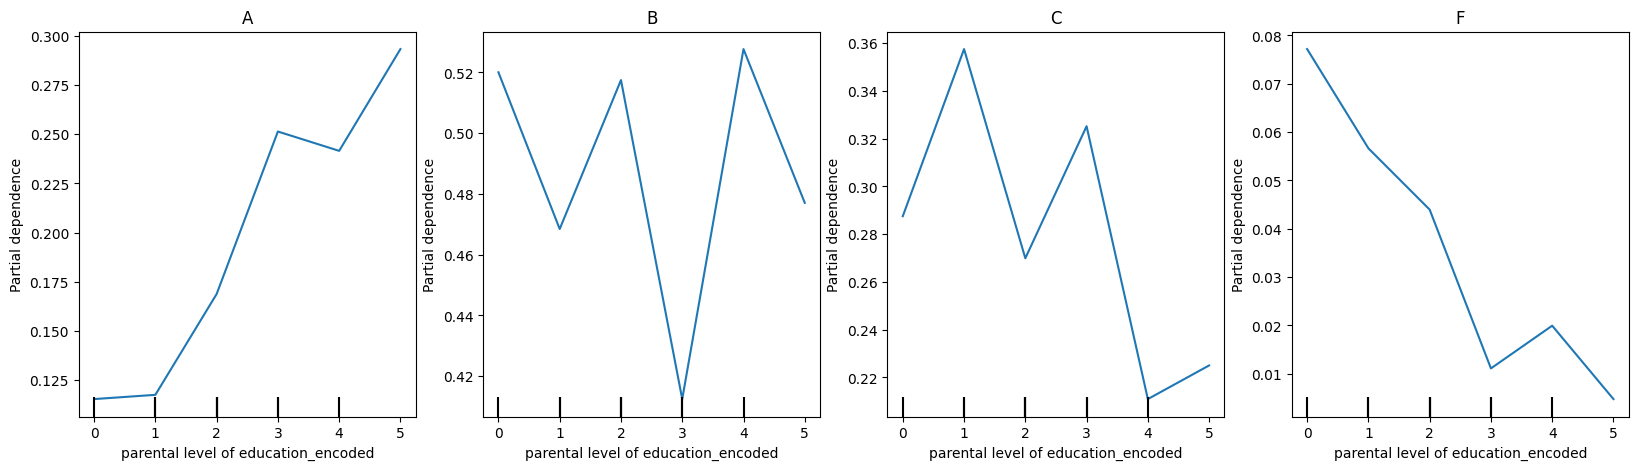

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Retrieve and load the data
url = 'https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/Data/StudentsPerformance.csv'
data = pd.read_csv(url)

# Step 2: Convert 'math score' to 'math grade'
def assign_math_grade(score):
    if score >= 80:
        return 'A'
    elif 60 <= score < 80:
        return 'B'
    elif 40 <= score < 60:
        return 'C'
    else:
        return 'F'
data['math grade'] = data['math score'].apply(assign_math_grade)

# Step 3: Encode categorical features into numerical values
# Need to encode the column in right order to better understand partial dependence plots
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    if feature == 'parental level of education':
      data[feature + '_encoded'] = le.fit_transform(data[feature].map({
          'some high school': 0,
          'high school': 1,
          'some college': 2,
          "associate's degree": 3,
          "bachelor's degree": 4,
          "master's degree": 5
      }))
    elif feature == 'race/ethnicity':
      data[feature + '_encoded'] = le.fit_transform(data[feature].map({
          'group A': 0,
          'group B': 1,
          'group C': 2,
          'group D': 3,
          'group E': 4,
      }))
    else:
      data[feature + '_encoded'] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Step 4: Split the data into training/validation and test sets
features = [feature + '_encoded' for feature in categorical_features]
target = 'math grade'
X_train_val, X_test, y_train_val, y_test = train_test_split(data[features], data[target],
                                                            test_size=0.2, random_state=42, stratify=data['math grade'])

# Step 5: Build and train the random forest model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train_val, y_train_val)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Plot partial dependence for each target class
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(20, 5))
target_classes = ['A', 'B', 'C', 'F']
for i, target in enumerate(target_classes):
    ax[i].set_title(target)
    display = PartialDependenceDisplay.from_estimator(model, data[features], features=['parental level of education_encoded'], target=target, ax=ax[i])
plt.show()

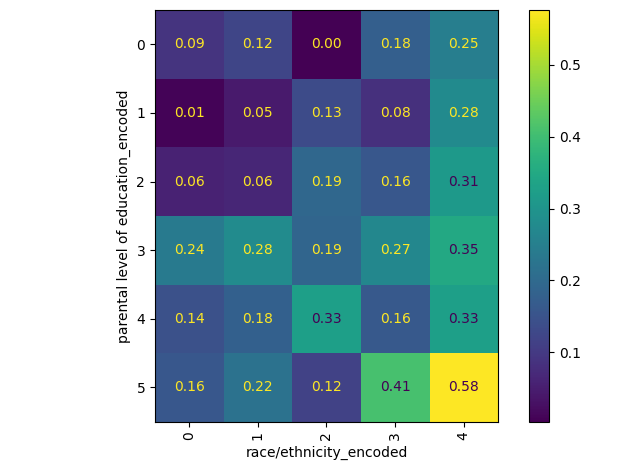

In [ ]:
PartialDependenceDisplay.from_estimator(model, data[features], features=[('parental level of education_encoded', 'race/ethnicity_encoded')],
                                        categorical_features=[True]*5, target='A')
plt.tight_layout()
plt.show()

**Prompt**:  
Compute the correlation between Parent Level of Education and Ethnicity. Note that those two features are categorical.

---

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming you have loaded the data into the 'data' DataFrame

# Select the 'Parent Level of Education' and 'Ethnicity' columns
parent_education = data['parental level of education']
ethnicity = data['race/ethnicity']

# Create a contingency table
contingency_table = pd.crosstab(parent_education, ethnicity)

# Compute the chi-square test statistic and p-value
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate the Cramér's V coefficient
num_samples = len(data)
num_rows = contingency_table.shape[0]
num_cols = contingency_table.shape[1]
cramer_v = np.sqrt(chi2 / (num_samples * (min(num_rows, num_cols) - 1)))

# Print the Cramér's V coefficient
print("Cramér's V coefficient:", cramer_v)


Cramér's V coefficient: 0.08581762860726488


**Prompt**:  
Show the percentage of Parent Level of Education distributions of the overall population, the percentage of Parent Level of Education distributions of Ethnicity group A and the percentage of Parent Level of Education distributions of Ethnicity group C.

Show those percentages in a clustered column plot where X-axis shows Parent Level of Education with order 'some high school', 'high school', 'some college', "associate's degree", "bachelor's degree" and "master's degree".

---

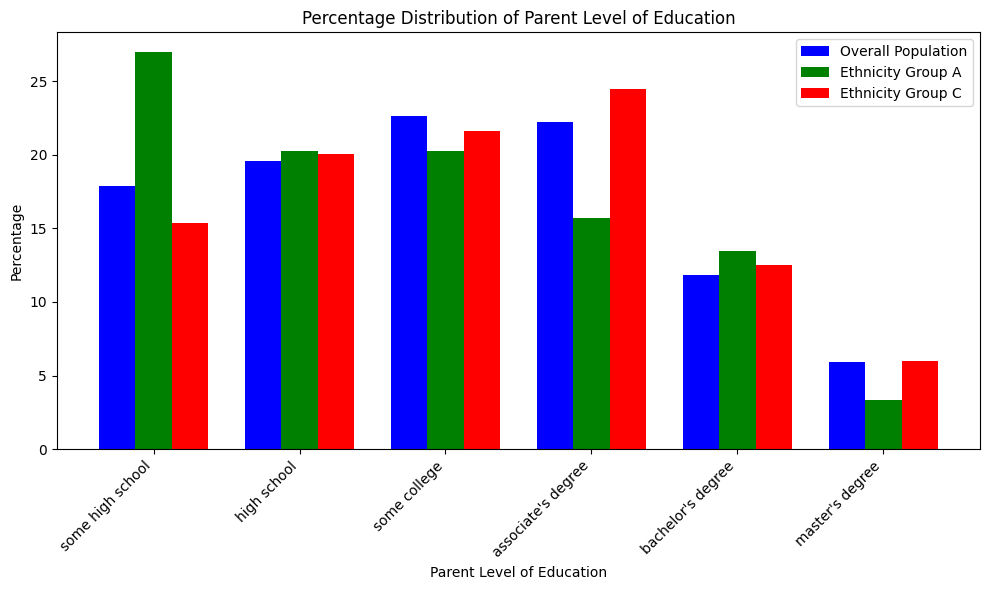

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into the 'data' DataFrame

# Define the desired order of 'Parent Level of Education' categories
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

# Group the data by 'Parent Level of Education' and count the occurrences
grouped_data_overall = data['parental level of education'].value_counts().reindex(education_order)
grouped_data_group_a = data[data['race/ethnicity'] == 'group A']['parental level of education'].value_counts().reindex(education_order)
grouped_data_group_c = data[data['race/ethnicity'] == 'group C']['parental level of education'].value_counts().reindex(education_order)

# Calculate the total counts for each category
total_counts_overall = grouped_data_overall.sum()
total_counts_group_a = grouped_data_group_a.sum()
total_counts_group_c = grouped_data_group_c.sum()

# Calculate the percentage distribution
percentage_data_overall = (grouped_data_overall / total_counts_overall) * 100
percentage_data_group_a = (grouped_data_group_a / total_counts_group_a) * 100
percentage_data_group_c = (grouped_data_group_c / total_counts_group_c) * 100

# Get the categories
categories = percentage_data_overall.index.tolist()

# Set the figure size and create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Set the position of the bars
bar_width = 0.25
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the overall population distribution
ax.bar(r1, percentage_data_overall, color='b', width=bar_width, label='Overall Population')

# Plot the Ethnicity group A distribution
ax.bar(r2, percentage_data_group_a, color='g', width=bar_width, label='Ethnicity Group A')

# Plot the Ethnicity group C distribution
ax.bar(r3, percentage_data_group_c, color='r', width=bar_width, label='Ethnicity Group C')

# Set the labels and title
ax.set_xlabel('Parent Level of Education')
ax.set_ylabel('Percentage')
ax.set_title('Percentage Distribution of Parent Level of Education')
ax.set_xticks([r + bar_width for r in range(len(categories))])
ax.set_xticklabels(categories, rotation=45, ha='right')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
